# Introduction to Regression with statsmodels in Python

## Simple Linear Regression Modeling

### A tale of two variables

In [1]:
import pandas as pd

df_trs = pd.read_csv(r'./data/taiwan_real_estate2.csv')
df_trs.head()

,dist_to_mrt_m,n_convenience,house_age_years,price_twd_msq
0,84.87882,10,30 to 45,11.467474
1,306.59470,9,15 to 30,12.768533
2,561.98450,5,0 to 15,14.311649
3,561.98450,5,0 to 15,16.580938
4,390.56840,5,0 to 15,13.040847


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

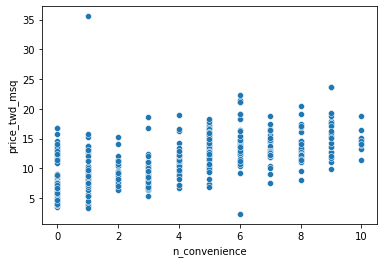

In [3]:
# Draw the scatter plot
sns.scatterplot(x="n_convenience",
                y="price_twd_msq",
                data=df_trs)


# Show the plot
plt.show()

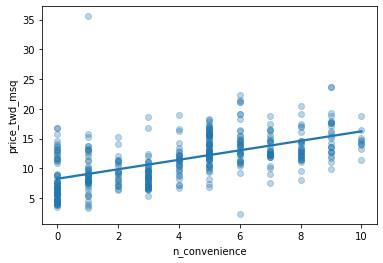

In [4]:
# Draw a trend line on the scatter plot of price_twd_msq vs. n_convenience
sns.regplot(
    x="n_convenience"
    , y="price_twd_msq"
    , data=df_trs
    , ci = None
    , scatter_kws = {'alpha': 0.3}
)

# Show the plot
plt.show()

### Fitting a linear regression

In [5]:
import statsmodels.formula.api as sfa

In [6]:
# Use ols function - Ordinary Least Squared
# Create the model object
mdl_price_vs_conv = sfa.ols('price_twd_msq ~ n_convenience', data=df_trs)

# Fit the model
mdl_price_vs_conv = mdl_price_vs_conv.fit()

# Print the parameters of the fitted model
print(mdl_price_vs_conv.params)

Intercept        8.224237
n_convenience    0.798080
dtype: float64


### Categorical explanatory variables

In [7]:
import seaborn as sns

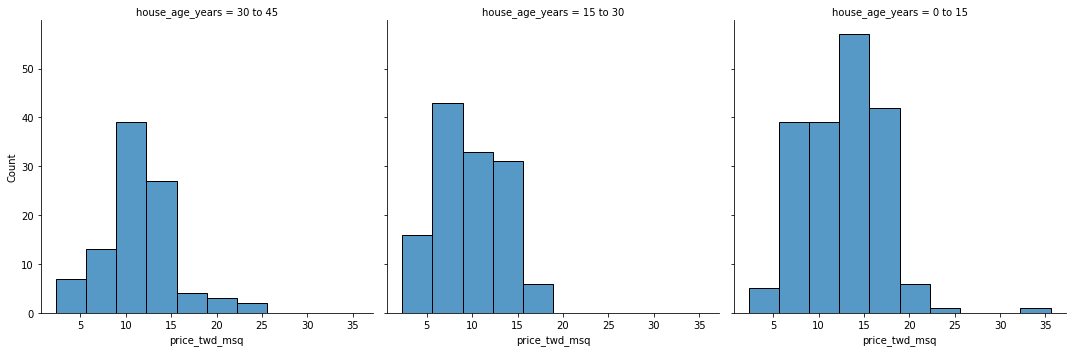

In [8]:
# Histograms of price_twd_msq with 10 bins, split by the age of each house
sns.displot(
    data=df_trs
    , x='price_twd_msq'
    , col='house_age_years'
    , col_wrap=3
    , bins=10)

# Show the plot
plt.show();

In [9]:
# Calculate the mean of price_twd_msq, grouped by house age
mean_price_by_age = df_trs.groupby('house_age_years')['price_twd_msq'].mean()

# Print the result
print(mean_price_by_age)

house_age_years
0 to 15     12.637471
15 to 30     9.876743
30 to 45    11.393264
Name: price_twd_msq, dtype: float64


In [10]:
# Create the model, fit it
mdl_price_vs_age = sfa.ols('price_twd_msq ~ house_age_years', data=df_trs).fit()

# Print the parameters of the fitted model
print(mdl_price_vs_age.params)

Intercept                      12.637471
house_age_years[T.15 to 30]    -2.760728
house_age_years[T.30 to 45]    -1.244207
dtype: float64


In [11]:
# Update the model formula to remove the intercept
mdl_price_vs_age0 = sfa.ols("price_twd_msq ~ house_age_years +0", data=df_trs).fit()

# Print the parameters of the fitted model
print(mdl_price_vs_age0.params)

house_age_years[0 to 15]     12.637471
house_age_years[15 to 30]     9.876743
house_age_years[30 to 45]    11.393264
dtype: float64


## Predictions and Model Objects

### Making predictions

In [14]:
import numpy as np

# Create explanatory dataset with number of convenience stores from 0 to 10
explanatory_data = pd.DataFrame({'n_convenience': np.arange(0, 11)})

# Use mdl_price_vs_conv to predict price_twd_msq for the explanatory data
predicted_price_twd_msq = mdl_price_vs_conv.predict(explanatory_data)

print(predicted_price_twd_msq)

0      8.224237
1      9.022317
2      9.820397
3     10.618477
4     11.416556
5     12.214636
6     13.012716
7     13.810795
8     14.608875
9     15.406955
10    16.205035
dtype: float64


In [15]:
# Create prediction dataset
prediction_data = explanatory_data.assign(
  predicted_price_twd_msq = mdl_price_vs_conv.predict(explanatory_data)
)

prediction_data

,n_convenience,predicted_price_twd_msq
0,0,8.224237
1,1,9.022317
2,2,9.820397
3,3,10.618477
4,4,11.416556
5,5,12.214636
6,6,13.012716
7,7,13.810795
8,8,14.608875
9,9,15.406955


### Visualizing Predictions

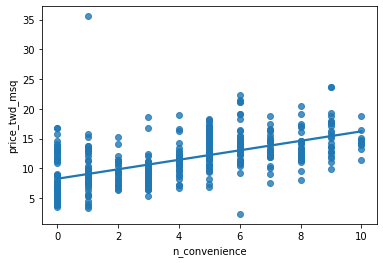

In [19]:
# Create a new figure for plotting

fig = plt.figure()

sns.regplot(
  data=df_trs
  , x='n_convenience'
  , y='price_twd_msq'
  , ci=None
)
plt.show();

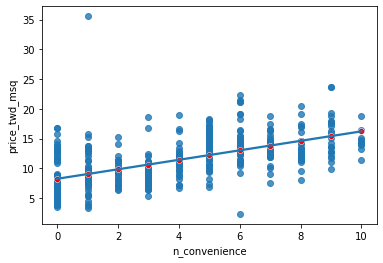

In [22]:
sns.regplot(
  data=df_trs
  , x='n_convenience'
  , y='price_twd_msq'
  , ci=None
)

sns.scatterplot(
  data=prediction_data
  , x='n_convenience'
  , y='predicted_price_twd_msq'
  , color='red'
)
plt.show();

In [24]:
# Create impossible data
impossible = pd.DataFrame({'n_convenience':[-1, 2.5]})
mdl_price_vs_conv.predict(impossible)

0     7.426158
1    10.219437
dtype: float64

### Working with Model Objects

In [25]:
mdl_price_vs_conv.params

Intercept        8.224237
n_convenience    0.798080
dtype: float64

In [26]:
mdl_price_vs_conv.fittedvalues

0      16.205035
1      15.406955
2      12.214636
3      12.214636
4      12.214636
         ...    
409     8.224237
410    15.406955
411    13.810795
412    12.214636
413    15.406955
Length: 414, dtype: float64

In [27]:
mdl_price_vs_conv.resid

0     -4.737561
1     -2.638422
2      2.097013
3      4.366302
4      0.826211
         ...   
409   -3.564631
410   -0.278362
411   -1.526378
412    3.670387
413    3.927387
Length: 414, dtype: float64

In [28]:
mdl_price_vs_conv.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          price_twd_msq   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     199.3
Date:                Mon, 06 May 2024   Prob (F-statistic):           3.41e-37
Time:                        12:10:39   Log-Likelihood:                -1091.1
No. Observations:                 414   AIC:                             2186.
Df Residuals:                     412   BIC:                             2194.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         8.2242      0.285     28.857      0.000       7.664       8.784
n_convenience     0.7981      0.057     14.118      0.000       0.687       0.909
==============================================================================
Omnibus:                      171.927   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1417.242
Skew:                           1.553   Prob(JB):                    1.78e-308
Kurtosis:                      11.516   Cond. No.                         8.87
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
coeffs = mdl_price_vs_conv.params
intercept = coeffs[0]
slope = coeffs[1]
ptm = intercept + (slope*explanatory_data)
ptm

,n_convenience
0,8.224237
1,9.022317
2,9.820397
3,10.618477
4,11.416556
5,12.214636
6,13.012716
7,13.810795
8,14.608875
9,15.406955


In [32]:
print(
  ptm.assign( pred_auto = mdl_price_vs_conv.predict(explanatory_data) )
)

    n_convenience  pred_auto
0        8.224237   8.224237
1        9.022317   9.022317
2        9.820397   9.820397
3       10.618477  10.618477
4       11.416556  11.416556
5       12.214636  12.214636
6       13.012716  13.012716
7       13.810795  13.810795
8       14.608875  14.608875
9       15.406955  15.406955
10      16.205035  16.205035


### Regression to the mean

In [35]:
sp500_yearly_returns = pd.read_csv(r'./data/sp500_yearly_returns.csv')
sp500_yearly_returns.head()

,symbol,return_2018,return_2019
0,AAPL,-0.053902,0.889578
1,MSFT,0.207953,0.575581
2,AMZN,0.284317,0.230278
3,FB,-0.257112,0.565718
4,GOOGL,-0.008012,0.281762


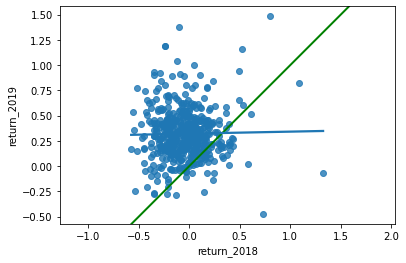

In [38]:
fig = plt.figure()

plt.axline(
  xy1=(0,0)
  , slope=1
  , linewidth=2
  , color='green'
)

sns.regplot(
  data=sp500_yearly_returns
  , x='return_2018'
  , y='return_2019'
  , ci=None
)

plt.axis('equal')
plt.show();

In [41]:
mdl_returns = sfa.ols('return_2019 ~ return_2018', data=sp500_yearly_returns).fit()
print(mdl_returns.params)

Intercept      0.321321
return_2018    0.020069
dtype: float64


In [47]:
explanatory_data = pd.DataFrame({'return_2018': [-1,0,1]})

In [48]:
mdl_returns.predict(explanatory_data)

0    0.301251
1    0.321321
2    0.341390
dtype: float64

### Transforming Variables